# **Assignment 3**

**Different architectures tried out by me. The highest I could achieve below 20k params was the one with 99.34% accuracy**

Architecture | Dropout Param | Epochs | Batch Size | Train  accuracy | Val accuracy | Other Comments
--- | ---: | ---: | ---: | ---: | ---: | :---: |
8,8,32,dropout,transition,8,26,dropout,10 | 0.5 | 30 | 96 | 99.38 | 99.39 | Params ~ 22k
8,8,16,32,dropout,transition,8,14,30,dropout,10 | 0.2 | 30 | 128 | 99.18 | 99.37 | Params ~ 22k
**8,8,32,dropout,transition,8,8,32,dropout,10** | **0.5** | **30** | **128** | **98.99** | **99.34** | **_SUBMITTED_**
8,8,32,dropout,transition,8,26,dropout,10 | 0.5 | 30 | 64 | 99.11 | 99.32 | NA
8,8,32,dropout,transition,8,26,dropout,10 | 0.4 | 30 | 64 | 99.4 | 99.31 | NA
8,8,16,32,dropout,transition,8,14,30,dropout,10 | 0.3 | 30 | 128 | 99.28 | 99.31 | NA
8,8,32,dropout,transition,8,26,dropout,10 | 0.5 | 30 | 128 | 99.5 | 99.26 | NA
8,8,32,dropout,transition,8,8,26,dropout,10 | 0.5 | 30 | 128 | 98.96 | 99.25 | NA
8,16,32,dropout,transition,8,16,dropout,10 | 0.2 | 30 | 32 | 99.51 | 99.22 | NA
8,8,32,dropout,transition,8,26,dropout,10 | 0.3 | 30 | 64 | 99.48 | 99.2 | NA
8,16,32,dropout,transition,8,16,dropout,10 | 0.2 | 50 | 32 | 99.67 | 99.19 | NA
8,16,32,dropout,transition,8,16,dropout,10 | 0.5 | 30 | 64 | 99.35 | 99.17 | NA
8,16,32,dropout,transition,8,16,dropout,10 | 0.5 | 30 | 32 | 99.11 | 99.17 | NA
8,16,32,dropout,transition,8,16,dropout,10 | 0.5 | 30 | 32 | 98.91 | 99.09 | NA
8,16,32,dropout,transition,8,16,dropout,10 | 0.2 | 30 | 64 | 99.5 | 99.06 | NA
8,8,16,32,dropout,transition,8,14,30,dropout,10 | 0.5 | 30 | 128 | 99 | 99.03 | NA
8,16,32,transition,8,16,10 | NA | 10 | 32 | 99.49 | 99.01 | NA
8,8,8,32,dropout,transition,8,8,32,dropout,10 | 0.5 | 30 | 128 | 98.94 | 98.93 | NA
8,8,16,32,dropout,transition,8,8,32,dropout,10 | 0.5 | 30 | 128 | 98.97 | 98.89 | NA
8,8,16,32,transition,8,14,30,10 | NA | 20 | 128 | 99.52 | 98.89 | NA
8,16,32,transition,8,16,10 | NA | 20 | 32 | 99.8 | 98.84 | NA
8,16,32,transition,8,16,10 | NA | 30 | 32 | 99.81 | 98.8 | NA
8,8,16,32,dropout,transition,8,14,30,dropout,10 | 0.1 | 20 | 128 | 99.35 | 98.23 | NA
8,8,16,32,dropout,transition,8,14,30,dropout,10 | 0.15 | 20 | 128 | 99.35 | 98.23 | NA

## Install Keras

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


## Import the required keras and numpy libraries

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


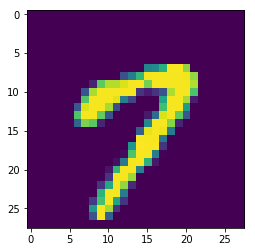

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[15])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Why does the network look like this:
* For a 28x28 image input, third layer achieves edges and gradients (as seen at the end)
* The transition layer of 1x1 and MaxPool is present after the 3rd layer
* The third layer is also when we have more kernels
* Due to constraints on trainable parameters, the previous layers have only 8 kernels
* Training accuracy was high compared to val acc adn therefore dropout was used, which increased accuracy

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(8, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(32, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(8, 3, activation='relu'))
model.add(Convolution2D(8, 3, activation='relu'))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 8)         584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        2336      
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 32)        1056      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 8)           2312      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=30, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/30
60000/60000 [==============================] - 6s 103us/step - loss: 0.4478 - acc: 0.8564
Epoch 2/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.1566 - acc: 0.9514
Epoch 3/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.1170 - acc: 0.9643
Epoch 4/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.0981 - acc: 0.9697
Epoch 5/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.0847 - acc: 0.9742
Epoch 6/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.0780 - acc: 0.9760
Epoch 7/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.0683 - acc: 0.9789
Epoch 8/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.0672 - acc: 0.9791
Epoch 9/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.0645 - acc: 0.9802
Epoch 10/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.0599 - acc: 0.981

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.028776171516254546, 0.9934]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[2.99156149e-08 5.62093533e-07 1.40223110e-05 2.86236336e-05
  7.93991817e-10 3.54505733e-06 5.10903067e-14 9.99932408e-01
  2.93074959e-06 1.78162954e-05]
 [1.95497778e-05 6.17125115e-05 9.99894023e-01 2.84431714e-08
  1.42781175e-07 1.86810443e-08 2.43931008e-05 6.37749298e-10
  1.37851899e-07 1.35040379e-09]
 [4.67365862e-05 9.93144989e-01 3.00623686e-03 2.16175904e-05
  1.49994856e-03 1.51127460e-04 1.63547287e-04 1.64187083e-03
  1.07128020e-04 2.16743705e-04]
 [9.79894340e-01 2.51320031e-08 5.72915160e-05 8.57622672e-06
  7.79322454e-06 4.83072130e-04 1.90632548e-02 3.76261568e-07
  6.12062795e-05 4.23982157e-04]
 [6.20842711e-10 2.08649154e-10 5.29203037e-09 4.35590834e-11
  9.99367177e-01 1.15416676e-09 2.57652118e-07 3.84827743e-08
  1.89105691e-07 6.32437645e-04]
 [4.29473293e-05 9.95247900e-01 1.63207075e-03 1.18351290e-05
  1.22246938e-03 1.29599692e-04 7.06185383e-05 1.34934287e-03
  9.49489986e-05 1.98215377e-04]
 [2.79912693e-14 4.77085358e-08 2.39853772e-08 5.78284904e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [19]:
layer_dict

{'activation_1': <keras.layers.core.Activation at 0x7fb7ba06f4a8>,
 'conv2d_1': <keras.layers.convolutional.Conv2D at 0x7fb7bd256e48>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x7fb7bd256358>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x7fb7baa111d0>,
 'conv2d_4': <keras.layers.convolutional.Conv2D at 0x7fb7ba164eb8>,
 'conv2d_5': <keras.layers.convolutional.Conv2D at 0x7fb7ba164b70>,
 'conv2d_6': <keras.layers.convolutional.Conv2D at 0x7fb7ba191e48>,
 'conv2d_7': <keras.layers.convolutional.Conv2D at 0x7fb7ba0e6b00>,
 'conv2d_8': <keras.layers.convolutional.Conv2D at 0x7fb7ba0a9b38>,
 'dropout_1': <keras.layers.core.Dropout at 0x7fb7baa112e8>,
 'dropout_2': <keras.layers.core.Dropout at 0x7fb7ba110b00>,
 'flatten_1': <keras.layers.core.Flatten at 0x7fb7ba0a9f28>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x7fb7ba191a90>}

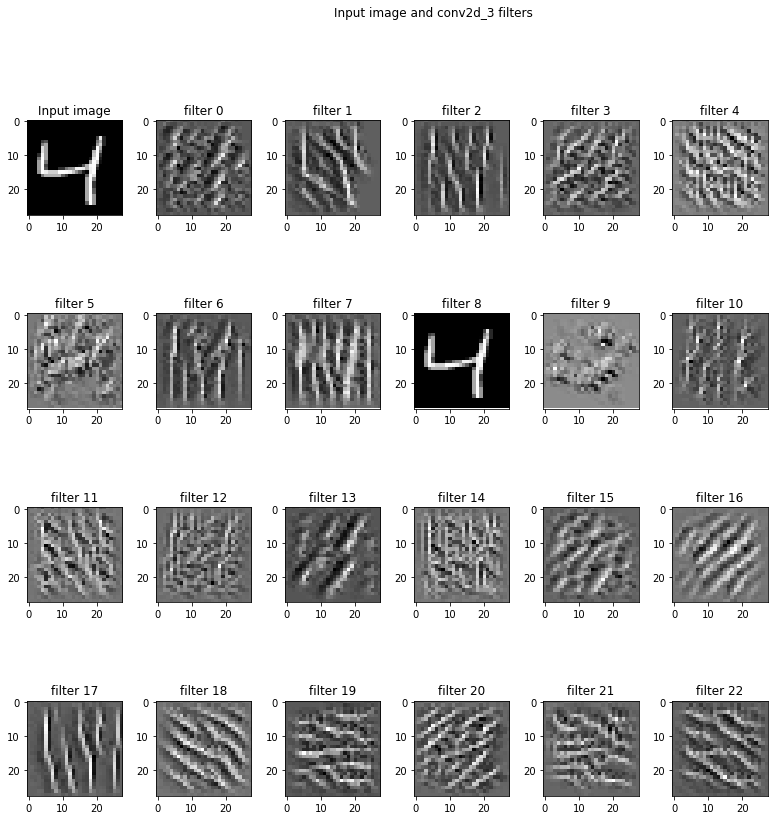

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_3'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()